<ipython-input-5-12c99d09ce22>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=ozone_df, x='Year', y='Data Value', estimator='mean', ci=None)


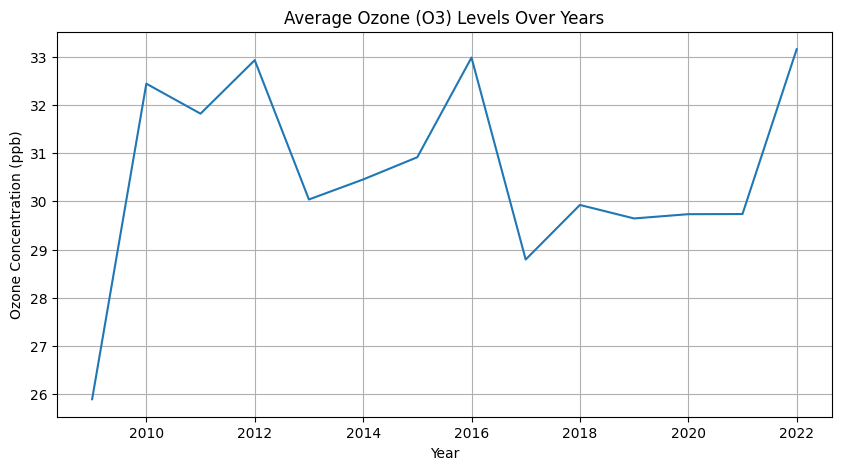

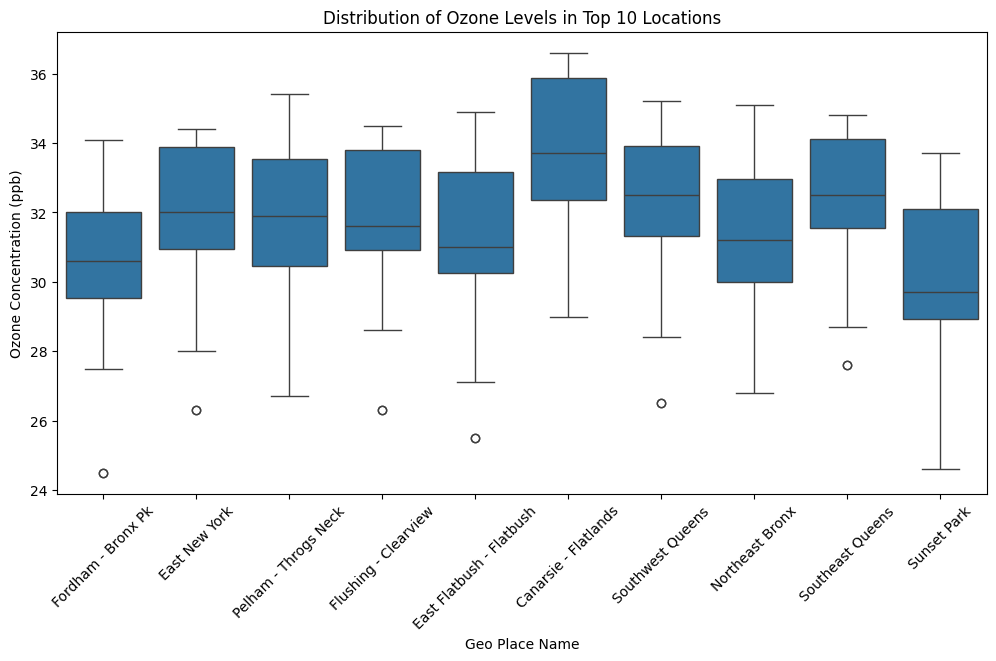

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Air_Quality.csv')  # Upload this in Colab

# Convert Start_Date to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

# Filter for Ozone data
ozone_df = df[df['Name'] == 'Ozone (O3)'].dropna(subset=['Start_Date', 'Data Value'])

# Extract Year from Start_Date
ozone_df['Year'] = ozone_df['Start_Date'].dt.year

# Plot 1: Line Plot of Average Ozone Levels Over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=ozone_df, x='Year', y='Data Value', estimator='mean', ci=None)
plt.title('Average Ozone (O3) Levels Over Years')
plt.ylabel('Ozone Concentration (ppb)')
plt.grid(True)
plt.show()

# Plot 2: Boxplot for Ozone Levels by Location
plt.figure(figsize=(12, 6))
top_locations = ozone_df['Geo Place Name'].value_counts().nlargest(10).index
sns.boxplot(data=ozone_df[ozone_df['Geo Place Name'].isin(top_locations)],
            x='Geo Place Name', y='Data Value')
plt.title('Distribution of Ozone Levels in Top 10 Locations')
plt.xticks(rotation=45)
plt.ylabel('Ozone Concentration (ppb)')
plt.show()


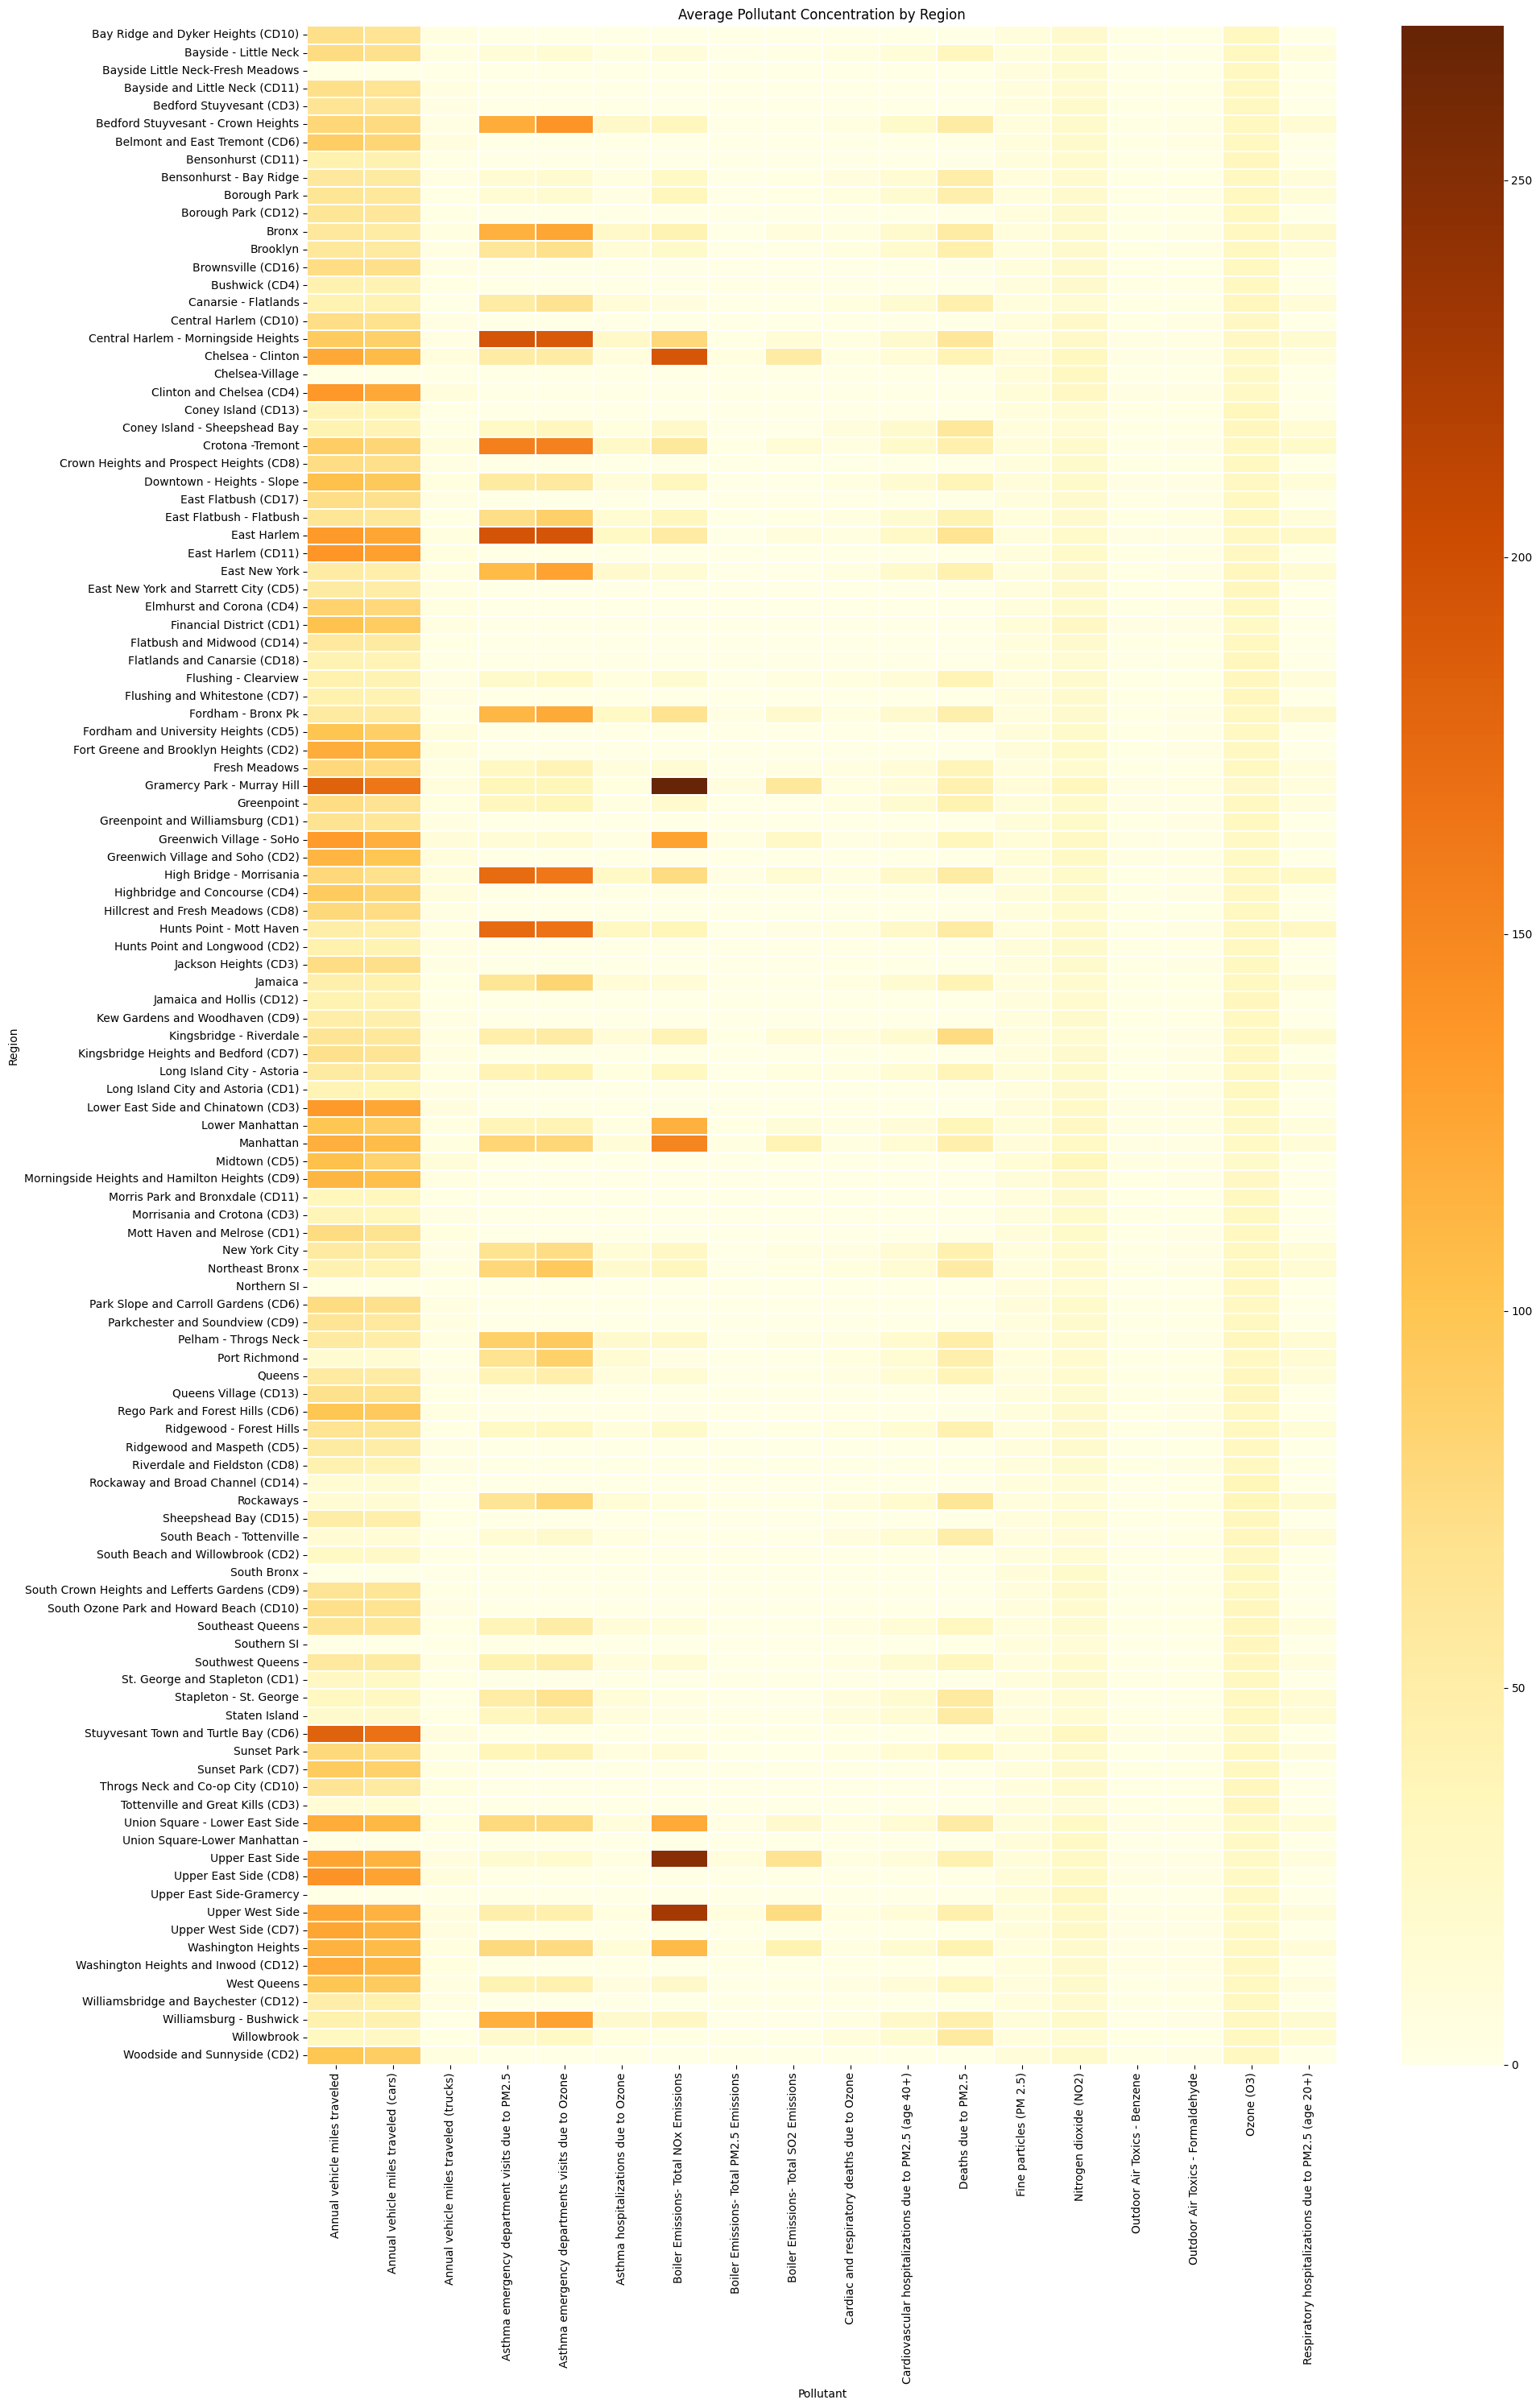

In [ ]:
# Group average data for each pollutant per region
pivot_df = df.pivot_table(values='Data Value', index='Geo Place Name', columns='Name', aggfunc='mean')

# Heatmap
plt.figure(figsize=(20, 30))
sns.heatmap(pivot_df.fillna(0), cmap='YlOrBr', linewidths=0.1)
plt.title('Average Pollutant Concentration by Region')
plt.xlabel('Pollutant')
plt.ylabel('Region')
plt.tight_layout()
plt.show()




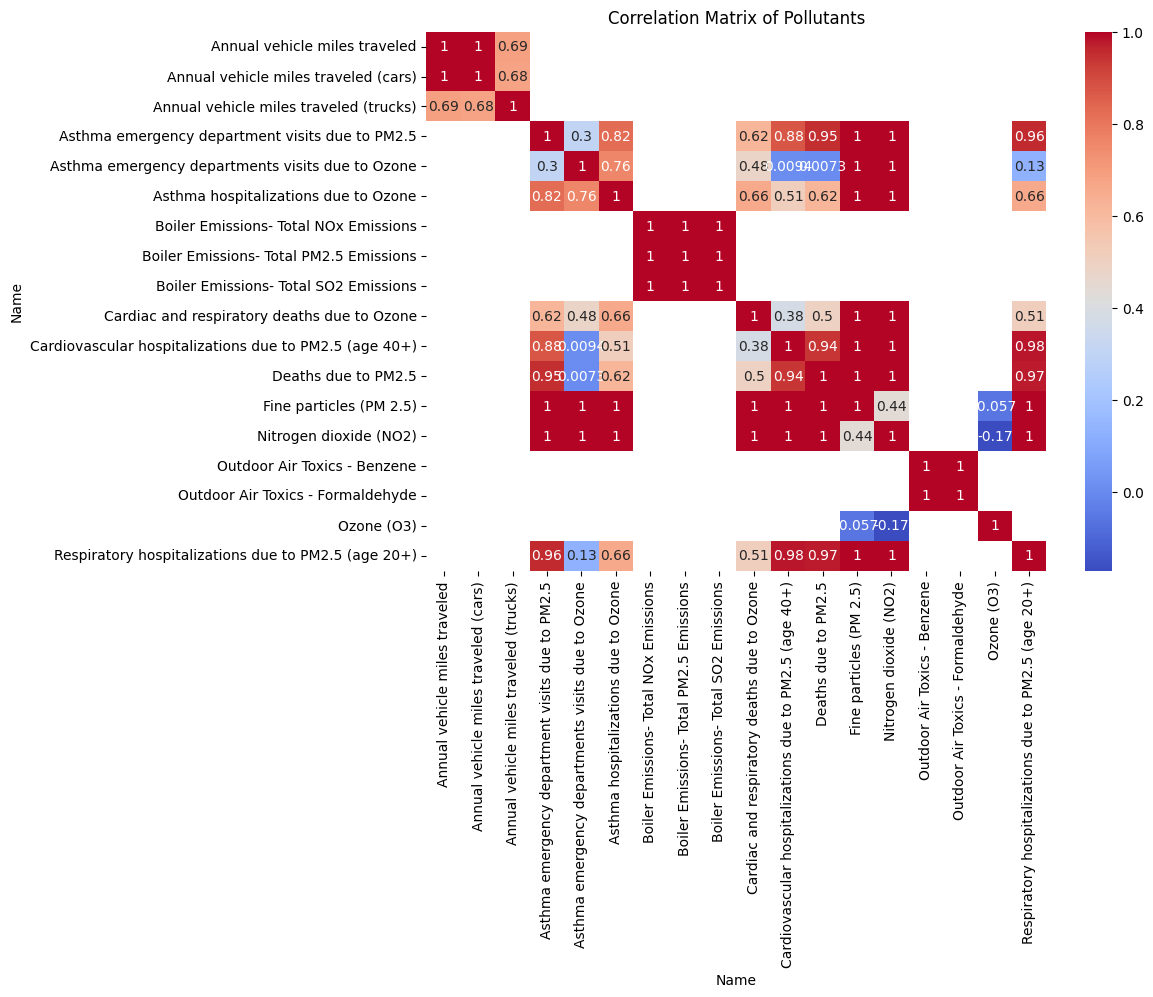

In [ ]:
# Create pivot table
corr_df = df.pivot_table(index='Start_Date', columns='Name', values='Data Value', aggfunc='mean')

# Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants')
plt.show()




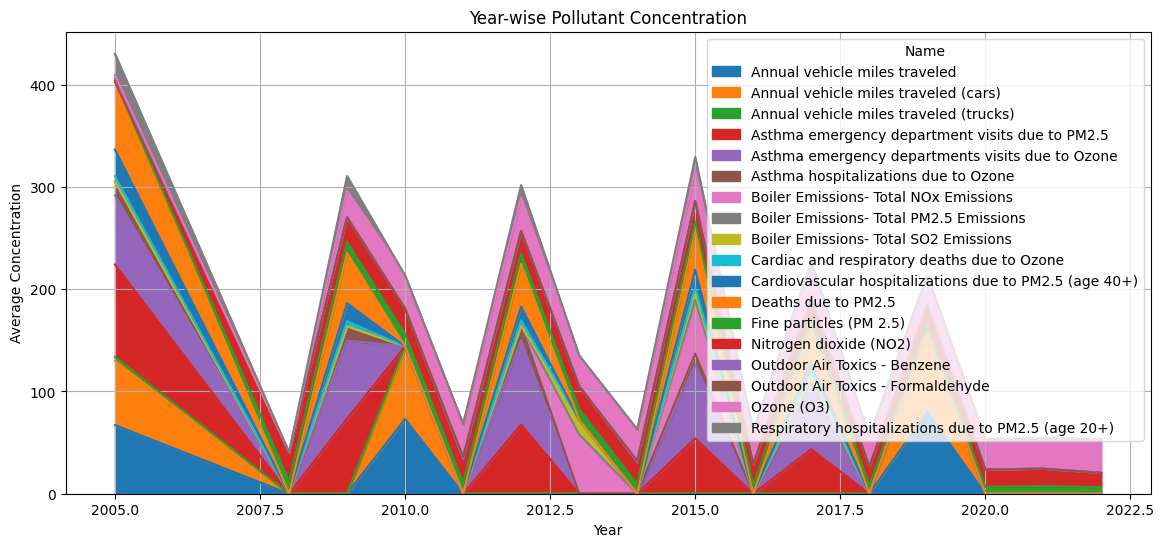

In [ ]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
df['Year'] = df['Start_Date'].dt.year
aqi_df = df[df['Name'].str.contains('AQI', na=False)]


# Area chart: stacked pollutant trends
pivot_area = df.pivot_table(index='Year', columns='Name', values='Data Value', aggfunc='mean')
pivot_area.fillna(0).plot.area(figsize=(14, 6), title='Year-wise Pollutant Concentration')
plt.ylabel('Average Concentration')
plt.grid()
plt.show()


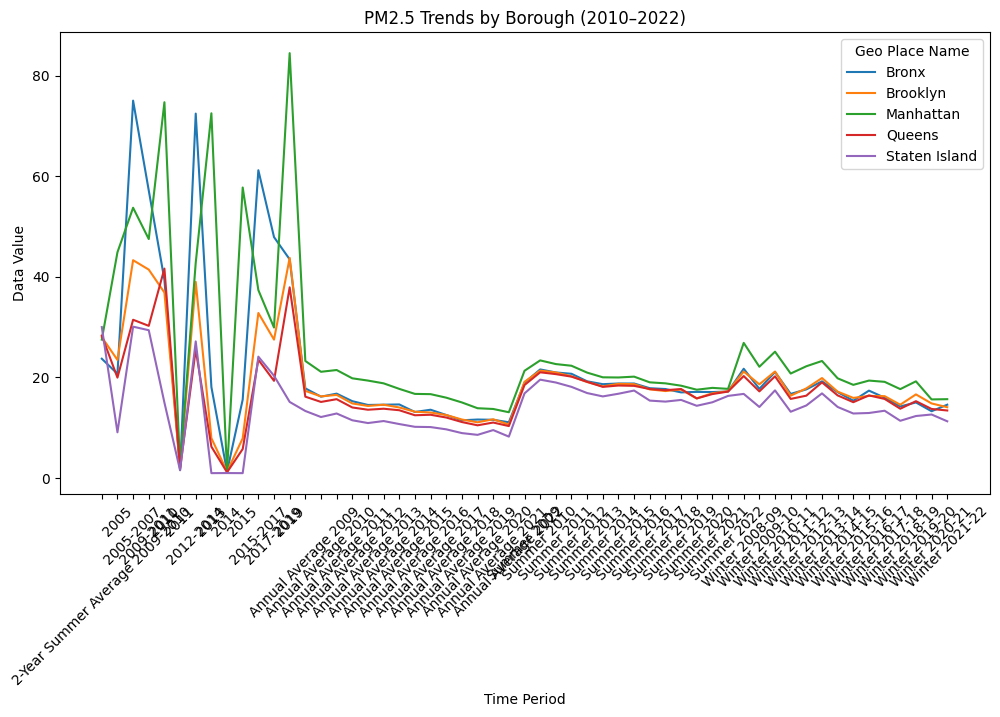

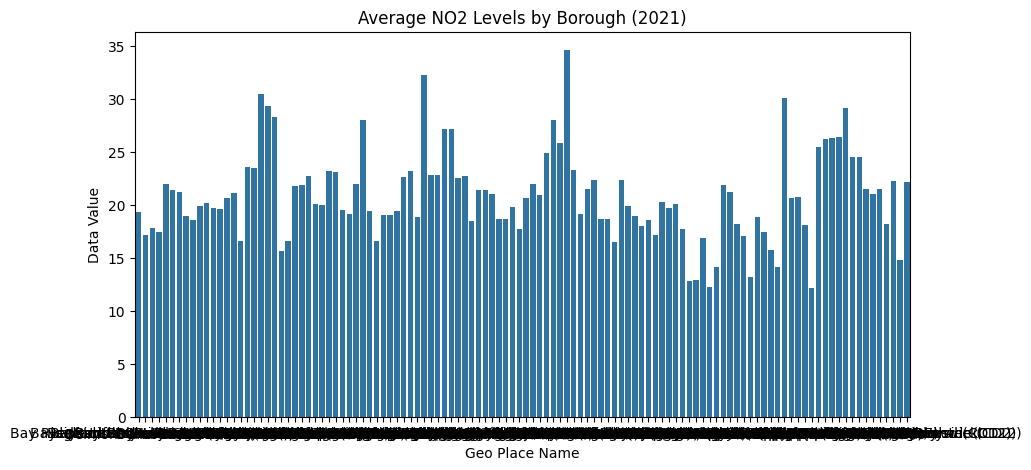

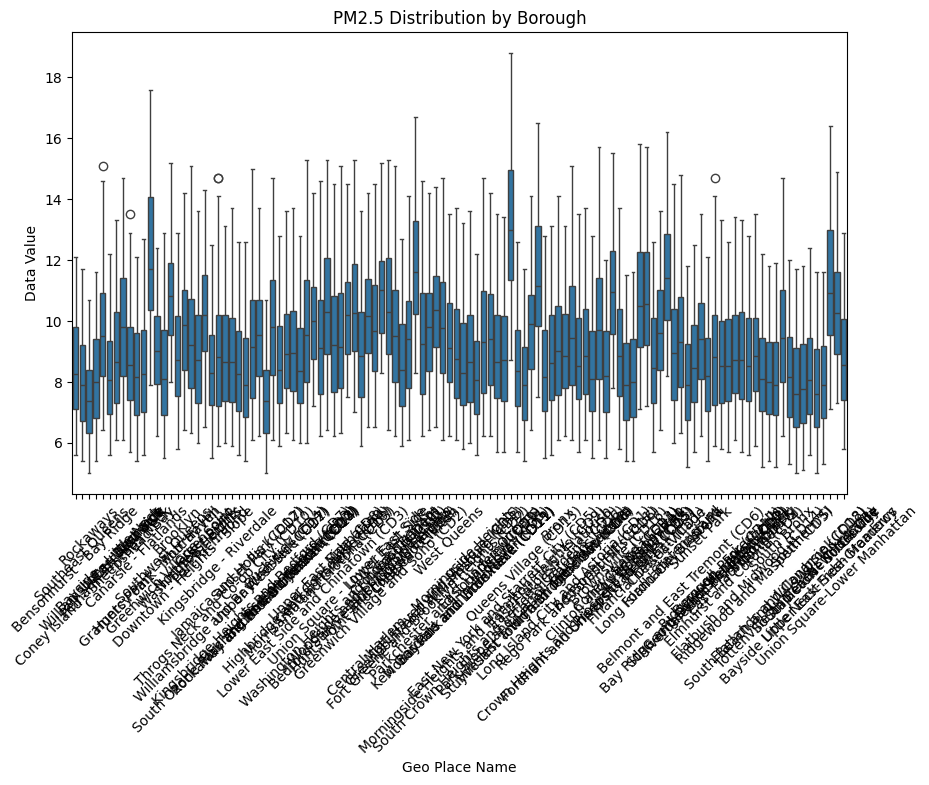

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter borough-level data
borough_pm = df[df['Geo Type Name'] == 'Borough'].groupby(['Geo Place Name', 'Time Period'])['Data Value'].mean().reset_index()
borough_no2 = df[df['Name'] == 'Nitrogen dioxide (NO2)'].groupby('Geo Place Name')['Data Value'].mean().reset_index()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=borough_pm, x='Time Period', y='Data Value', hue='Geo Place Name')
plt.title('PM2.5 Trends by Borough (2010–2022)')
plt.xticks(rotation=45)
plt.show()

# Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=borough_no2, x='Geo Place Name', y='Data Value')
plt.title('Average NO2 Levels by Borough (2021)')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['Name'] == 'Fine particles (PM 2.5)'], x='Geo Place Name', y='Data Value')
plt.title('PM2.5 Distribution by Borough')
plt.xticks(rotation=45)
plt.show()
